**House Price Prediction using Simple Neural Network:**

The Boston Housing dataset is loaded using keras.datasets.boston_housing.load_data() function. The dataset is split into training and testing sets, and the input features are standardized using mean and standard deviation values calculated from the training set.

A neural network is defined using the Keras Sequential model. It consists of two hidden layers with 64 neurons each and an output layer with a single neuron.

The model is compiled using the Adam optimizer and the mean squared error loss function.

The model is trained using the training set and validated using a validation split of 0.2. The training is done for 100 epochs with a batch size of 32.

The performance of the model is evaluated using the testing set, and the mean squared error and mean absolute error are printed.

Finally, the model is used to make predictions on the testing se

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

x_train_mean = np.mean(x_train, axis=0)
x_train_std = np.std(x_train, axis=0)
x_train = (x_train - x_train_mean) / x_train_std
x_test = (x_test - x_train_mean) / x_train_std

# Define neural network architecture
model = keras.Sequential([
  keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train model
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# # Evaluate model
loss,mae,mse= model.evaluate(x_test, y_test)
print('Mean squared error:', mse)
print('Mean absolute error:', mae)

# Make predictions
predictions = model.predict(x_test)




Epoch 1/100
11/11 [==============================] - 1s 14ms/step - loss: 523.8509 - mae: 20.9884 - mse: 523.8509 - val_loss: 563.9610 - val_mae: 21.9508 - val_mse: 563.9610
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 470.4445 - mae: 19.6547 - mse: 470.4445 - val_loss: 501.4087 - val_mae: 20.4949 - val_mse: 501.4087
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 405.1739 - mae: 17.9696 - mse: 405.1739 - val_loss: 423.4567 - val_mae: 18.5964 - val_mse: 423.4567
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 327.8673 - mae: 15.7918 - mse: 327.8673 - val_loss: 329.1060 - val_mae: 16.0427 - val_mse: 329.1060
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 238.4011 - mae: 13.1276 - mse: 238.4011 - val_loss: 229.5571 - val_mae: 12.9588 - val_mse: 229.5571
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 154.2669 - mae: 10.1800 - mse: 154.2669 - val_loss: 143.9801 

In [21]:
predictions[2]



array([21.085384], dtype=float32)

In [22]:
y_test[2]

19.0

4/4 [==============================] - 0s 3ms/step


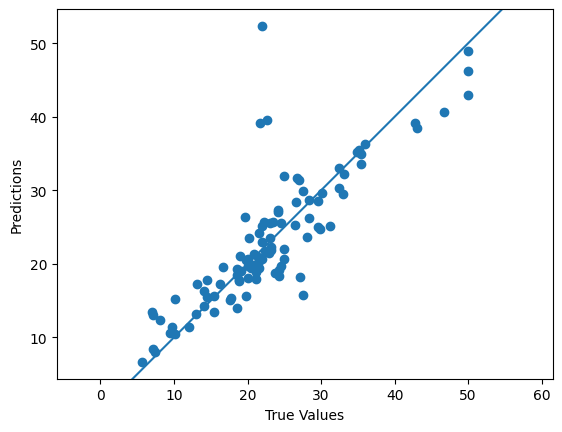

In [24]:
import matplotlib.pyplot as plt

# Predict the output for the test data
predictions = model.predict(x_test)

# Plot the predicted and true output values
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()


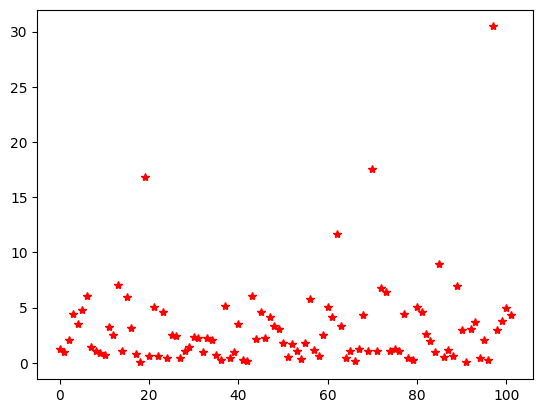

In [32]:
#error plot
plt.plot(abs(np.squeeze(predictions)-np.squeeze(y_test)),'r*')